### 풀이
- 볼록다각형 내부 점 판정을 이용해 푸는 문제.
- 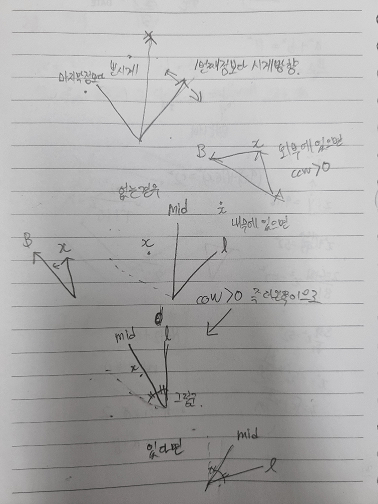
  - 이분 탐색과 ccw의 방향성을 익히기 위해 메모해둔 내용이다.

In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

ccw = lambda o, a, b: (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])
def get() :
  S = input().split()
  L = []
  for x, y in zip(S[::2], S[1::2]) :
    L.append((int(x), int(y)))
  return L

def inside(L, s) :
  if ccw(L[0], L[1], s) < 0 : return False #1번보다 더 바깥쪽에 있으면
  if ccw(L[0], L[-1], s) > 0 : return False #n-1번보다 더 안쪽에 있다면

  l, r = 1, len(L) - 1
  while l + 1 < r : #이분탐색으로 점이 있는 구간을 찾는다
    mid = (l + r) // 2
    if ccw(L[0], L[mid], s) > 0 : l = mid #없으면 바깥쪽으로
    else : r = mid

  A, B = l, l+1
  return ccw(L[A], s, L[B]) < 0

def sol():
  input()
  A, B, S = get(), get(), get()
  
  ans = 0
  for s in S :
    if not inside(A, s) or inside(B, s): #A안에 있어야 하며, B외부에 있어야 한다.
      ans += 1

  print(ans if ans else "YES")

sol()